## Implementação da decomposição LU com pivotaçao parcial 

In [9]:
import numpy as np

def troca(a,b):
    temp = a.copy()
    a[:] = b[:]
    b[:] = temp[:]
    
def encontraIndicePivo(v): #Dado um vetor, retorna a linha do elemento com o maior valor absoluto
    pivotrow = 0
    n = v.shape[0]
    for j in range(n):
        if (abs(v[j]) > abs(v[pivotrow])):
            pivotrow = j
    return pivotrow

def LUPivot(A):
    n = A.shape[0]
    U = A.copy()
    L = np.zeros((n,n))
    P = np.eye(A.shape[0])
    for k in range(n): 
        pivotrow = encontraIndicePivo(U[k:n,k]) + k #A soma do k é devido ao fato de que a função vai retornar o numero da linha como um delta apartir do k
        troca(U[k],U[pivotrow])
        troca(L[k],L[pivotrow])
        troca(P[k],P[pivotrow])
        for i in range (k+1,n): #para cada linha apos a do pivo
            m = U[i,k]/U[k,k] #calcula o multiplicador de uma determinada linha, que seja tambem elemento 
            L[i,k] = m   
            U[i] = U[i] - m*U[k]
    L = L + np.eye(A.shape[0])
    return L, U, P


## Implementação da decomposição de Cholesky 


In [10]:
from scipy.linalg import solve_triangular
def Cholesky(A):
    n = A.shape[0]
    L = np.zeros((n,n))
    for i in range(n): 
        for j in range (i+1):
            u = np.copy(L[i,0:j])
            v = np.copy(L[j,0:j])
            somatorio = np.dot(u,v) #armazena o somatorio referente ao dot product entre os elementos da linha i e j (referente ao calculo do Lij sendo calculado)
            if(i == j):
                L[i,j] = (A[i,j]- somatorio)**(0.5)
            if (i!=j):
                L[i,j] = (A[i,j]- somatorio)/L[j,j]
    return L

def resolveCholesky(L,b):
    y = solve_triangular(L, b, lower = True)
    x = solve_triangular(np.transpose(L), y)
    return x;

Para gerar matrizes que atendem a ambas as decomposições, é necessario que elas sejam positivas definidas e simetricas. Para tal foi suficiente gerar matrizes aleatorias de dimensao NxM (onde n é 2 elevado ao expoente da iteração em questão) e então multiplica-las por suas transpostas

In [11]:
expoentes = np.arange(8,12) 

tempos_LUPivot = np.zeros(len(expoentes)) #Arrays de armazenamento de tempos dos dois metodos
tempos_Chol = np.zeros(len(expoentes))
i = 0 

#Loop de geração das matrizes definidas positivas e simetricas 2^n por 2^n com n = [8,9,10,11]
for expoente in expoentes:
    n = 2**expoente
    m = n+1
    X = np.random.random((n,m))
    A = X @ X.T
    
    time_info = %timeit -r 3 -n 5 -q -o L,U,P = LUPivot(A) #Medição dos tempos gastos para executar a descomposicao LU com pivotação parcial
    tempos_LUPivot[i] = time_info.average
    time_info = %timeit -r 3 -n 5 -q -o L = Cholesky(A) #Medição do tempo médio gasto para executar a decomposição Cholesky 
    tempos_Chol[i] = time_info.average
    i = i + 1
    
    









## Grafico com as plotagens dos tempos

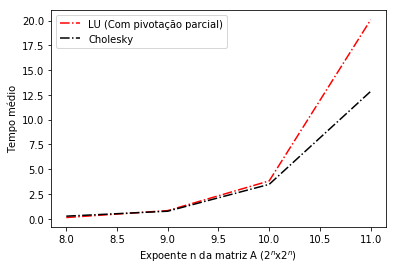

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(expoentes,tempos_LUPivot,'r-',label='LU (Com pivotação parcial)',color="Red",linestyle="dashdot") #Plotar os valores de tempo da decomp. LU pelo tempo
plt.plot(expoentes,tempos_Chol,'b-',label='Cholesky', color="Black",linestyle="dashdot") #Plota os valores de tempo da decomp. de Cholesky em preto
plt.xlabel('Expoente n da matriz A ($2^n$x$2^n$)')
plt.ylabel('Tempo médio')
plt.legend()

